In [ ]:
#Real one

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
class ANN:
    def __init__(self,epochs,lr):
        self.epochs=epochs
        self.lr=lr
        self.weight_collector={}
        self.loss_history=[]
        self.smoothing=1e-15
        self.alpha=1e-5
        self.w1=[]
        self.w2=[]
        self.w3=[]
        self.best_weights=[None,None,None]
        self.b1=3 # some constant value
        self.b2=4.5
        self.loss_thresold=float("inf")

    def fit(self,X_train,y_train):
        itr_numb=X_train.shape[0]
        #initializing weights using he normal 
        self.w1=np.random.randn(3)*np.sqrt(2/1)
        print(self.w1)
        #Node 2 initialization
        self.w2=np.random.randn(3)*np.sqrt(2/3)
        print(self.w2)

        #Node 3 initialization 
        self.w3=np.random.randn(2)*np.sqrt(2/2)
        print(self.w3)


        
        # Weight adjustments
        for k in range(0,self.epochs):
            loss_sum=0
            for i in range(0,itr_numb):
                #Node 1
                # multiplying weights with input 
                x_vec = X_train[i]
                node1_out = np.dot(x_vec,self.w1)+self.b1
                if node1_out<0:
                  node1_out = self.alpha*(node1_out)
                else:
                  node1_out = max(0,node1_out) # relu

                #Node 2
                x_vec = X_train[i]
                node2_out = np.dot(x_vec,self.w2)+self.b1
                if node2_out<0:
                  node2_out = self.alpha*(node2_out)
                else:
                  node2_out = max(0,node2_out) # relu

                #Node 3

                #Output layer

                out_layer = [node1_out,node2_out]

                # multiplying weights with input 
                x_vec = X_train[i]
                out_node = np.dot(out_layer,self.w3)+self.b2
                y_out=(1/(1+np.exp(-out_node)))

                #Loss/Cost function and weight updation

                # for node 1
                slope1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*
                           (self.w3[0]*X_train[i][0]))
                self.w1[0] = self.w1[0]-(self.lr*slope1)

                slope2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][1]))
                self.w1[1] = self.w1[1]-(self.lr*slope2)

                slope3 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][2]))
                self.w1[1] = self.w1[1]-(self.lr*slope3)

                # for node 2
                slope4 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][0]))
                self.w2[0] = self.w2[0]-(self.lr*slope4)

                slope5 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][1]))
                self.w2[1] = self.w2[1]-(self.lr*slope5)

                slope6 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][2]))
                self.w2[1] = self.w2[1]-(self.lr*slope6)

                #for output node 

                slope7 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node1_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node1_out)))
                self.w3[0] = self.w3[0]-(self.lr*slope7)

                slope8 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node2_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node2_out))) 
                self.w3[1] = self.w3[1]-(self.lr*slope8)

                #Updating the biases
                slope_bias1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]+self.w3[1])-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]+self.w3[1]))) 
                self.b1 = self.b1-(self.lr*slope_bias1)
                
                slope_bias2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out))-((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out)))) 
                self.b2 = self.b2-(self.lr*slope_bias2)

                ##Kepping the best weights
                loss_sum+=(y_train.iloc[i]*np.log(y_out+self.smoothing))+(
                    (1-y_train.iloc[i])*np.log(1-y_out+self.smoothing))
            
            final_loss = (-loss_sum/itr_numb)
            self.loss_history.append(final_loss)
            #check
            print("************************* epoch ",k," **************************")
            print("##########################################################")
            print("w1",self.w1)
            print("w2",self.w2)
            print("w3",self.w3)
            print("b1",self.b1)
            print("b2",self.b2)
            print(node1_out)
            print(node2_out)
            print(y_out)
            print("current loss is :- ",final_loss)
            if (self.loss_history[k]<self.loss_thresold):
              self.loss_thresold=self.loss_history[k]
              self.best_weights[0]=self.w1
              self.best_weights[1]=self.w2
              self.best_weights[2]=self.w3

    def predict(self,X_test):
      #test data
      itr_numb=X_test.shape[0]
      predictions=[]
      for i in range(0,itr_numb):
        #Node 1
        # multiplying weights with input 
        x_vec = X_test[i]
        node1_out = np.dot(x_vec,self.w1)+self.b1

        #Node 2
        x_vec = X_test[i]
        node2_out = np.dot(x_vec,self.w2)+self.b1

        #Node 3

        #Output layer

        out_layer = [node1_out,node2_out]

        # multiplying weights with input 
        x_vec = X_test[i]
        out_node = np.dot(out_layer,self.w3)+self.b2
        y_out=(1/(1+np.exp(-out_node)))
        predictions.append(y_out)
      return predictions

    def train_loss_plot(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epoch number")
        plt.ylabel("loss")
        plt.show()
    def test_report(self,y_test,predictions):
      conf_matrix = confusion_matrix(y_test,predictions)
      sns.heatmap(data=conf_matrix,annot=True,fmt='d')
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      print(classification_report(y_test,predictions))

# Data Preparation

In [4]:
df=pd.read_csv("/content/drive/MyDrive/backup lab/Jupyter lab backuu/Simple ANN classification /mixed.csv.txt",sep=",")

In [5]:
df.head(3)

,EvNo,trumu,chargesg,px,py,pz,E,muchhits,stshits,trdhits,tofhits,chisqmuch,chisqsts,chisqtrd,chisqvertex,tofmass
0,1,1,-1,0.853275,-0.847333,7.35208,7.45053,11,8,3,1,1.97966,3.15940,9.20906,2.96263,0.031319
1,2,0,1,-0.431410,-0.554361,4.25411,4.31301,9,8,3,0,3.89112,1.51397,22.56260,1.23243,-1000.000000
2,2,1,-1,0.217476,0.837259,5.95573,6.01915,11,7,4,1,1.61583,2.68982,1.63692,2.96849,-0.057862


In [6]:
X=df[["muchhits","trdhits","chisqmuch"]]#trdhits, chi much or chi sq vertex
y=df['trumu']

In [7]:
df.shape

(215343, 16)

In [8]:
X=X[0:30000]
y=y[0:30000]
scaling = MinMaxScaler()
X_scaled=scaling.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.50,random_state=32)

In [10]:
X_train.shape

(15000, 3)

In [11]:
y_train.value_counts()

0    8704
1    6296
Name: trumu, dtype: int64

In [12]:
y_test.value_counts()

0    8597
1    6403
Name: trumu, dtype: int64

# Testing

In [13]:
ann_object = ANN(100,0.0001)

In [14]:
ann_object.fit(X_train,y_train)

[0.63135811 0.23855253 0.25887642]
[ 0.23996454  1.61556243 -0.04059485]
[-0.50817973 -0.86794548]
************************* epoch  0  **************************
##########################################################
w1 [0.54890225 0.09766476 0.25887642]
w2 [ 0.12581283  1.42138314 -0.04059485]
w3 [-0.59657677 -0.62018155]
b1 3.0899800695955864
b2 4.365267706588276
3.5639410956703945
3.1744701336519587
0.5674404043365777
current loss is :-  0.9573590594777682
************************* epoch  1  **************************
##########################################################
w1 [ 0.44949028 -0.06977278  0.25887642]
w2 [ 0.04503658  1.28518753 -0.04059485]
w3 [-0.77228478 -0.49332473]
b1 3.1876976812711333
b2 4.415592572614106
3.587100182201786
3.2116148515927274
0.5154778420205335
current loss is :-  0.8684881474332935
************************* epoch  2  **************************
##########################################################
w1 [ 0.32594601 -0.26995159  0.25887642

In [15]:
ann_object.loss_history

[0.9573590594777682,
 0.8684881474332935,
 0.7887975288966933,
 0.7047785674973268,
 0.6145524250259816,
 0.5255975583552244,
 0.450245656328263,
 0.39530499341283193,
 0.3589414336906689,
 0.335760263563232,
 0.32096854623447424,
 0.3113504586052908,
 0.3049400125861958,
 0.3005594282227176,
 0.29749632525858444,
 0.2953105628319864,
 0.2937233044505094,
 0.292553355597021,
 0.29168007555673153,
 0.2910213084977202,
 0.29051994442366347,
 0.290135542743532,
 0.2898389918402247,
 0.28960902967764945,
 0.2894299298065364,
 0.289289932300951,
 0.2891801603357246,
 0.28909385939285226,
 0.28902585469107195,
 0.2889721587592759,
 0.2889296839863711,
 0.2888960296765679,
 0.28886932272105087,
 0.288848097344643,
 0.28883120365691867,
 0.288817737654523,
 0.28880698734340826,
 0.28879839107085875,
 0.28879150516955354,
 0.28878597874594303,
 0.2887815339779405,
 0.28877795067974854,
 0.28877505418404653,
 0.2887727058114324,
 0.2887707953631442,
 0.2887692351996201,
 0.2887679555646341,
 0.2

In [16]:
ann_object.w1

array([-0.99040209, -1.68558052,  0.25887642])

In [17]:
ann_object.loss_thresold

0.28875772762339064

In [18]:
ann_object.best_weights

[array([-0.99040209, -1.68558052,  0.25887642]),
 array([-0.20232657,  0.97039619, -0.04059485]),
 array([-3.12293937, -0.39807733])]

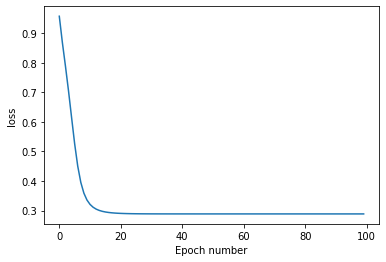

In [19]:
ann_object.train_loss_plot()

In [20]:
ann_object.w2

array([-0.20232657,  0.97039619, -0.04059485])

In [21]:
predictions=[]
predictions_sigmoid = ann_object.predict(X_test)
for i in predictions_sigmoid:
  if i>0.5:
    predictions.append(1)
  else:
    predictions.append(0)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8597
           1       0.88      0.88      0.88      6403

    accuracy                           0.90     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.90      0.90      0.90     15000



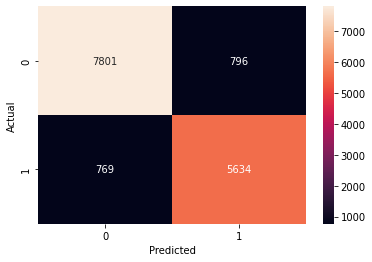

In [22]:
ann_object.test_report(y_test,predictions)
# [[1551 7046]
#  [ 146 6257]]

In [23]:
pd.Series(predictions).value_counts()

0    8570
1    6430
dtype: int64

<h1> Bias collector </h1>

In [27]:
#AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test,predictions)

In [ ]:
loss3=ann_object.loss_history

In [ ]:
# loss1=ann_object.loss_history

In [ ]:
# loss2=ann_object.loss_history

In [ ]:
bias_values={}

In [ ]:
bias_values[("b1=1,b2=1")]=loss1

In [ ]:
bias_values[("b1=10,b2=15")]=loss2

In [ ]:
bias_values[("b1=3,b2=4.5")]=loss3

In [ ]:
df_graph= pd.DataFrame(bias_values)

In [ ]:
df_graph['b1=1,b2=1']

0     0.716781
1     0.579789
2     0.491210
3     0.441233
4     0.402896
        ...   
95    0.290181
96    0.290181
97    0.290182
98    0.290182
99    0.290182
Name: b1=1,b2=1, Length: 100, dtype: float64

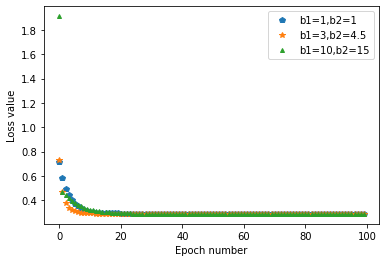

In [ ]:
plt.plot(df_graph['b1=1,b2=1'],'p')
plt.plot(df_graph['b1=3,b2=4.5'],"*")
plt.plot(df_graph['b1=10,b2=15'],"^",markersize=4)
plt.legend(['b1=1,b2=1',"b1=3,b2=4.5",'b1=10,b2=15'])
plt.xlabel("Epoch number")
plt.ylabel("Loss value")
plt.show()